## Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the Data

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
df_comp = raw_csv_data.copy()

## Examining the Data

In [3]:
df_comp.head(100)

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26
...,...,...,...,...,...
95,20/05/1994,454.92,2238.97,3127.28,20342.17
96,23/05/1994,453.20,2238.97,3108.40,20568.71
97,24/05/1994,454.81,2188.01,3089.10,20622.12
98,25/05/1994,456.34,2137.56,3020.70,20663.63


In [4]:
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [6]:
df_comp.spx.isna().sum()

0

## Plotting the Data

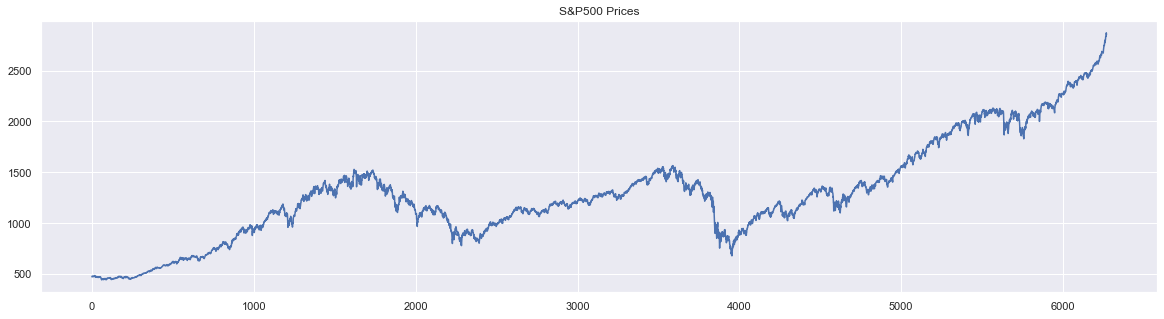

In [7]:
df_comp.spx.plot(figsize = (20,5),title = "S&P500 Prices")
plt.show()

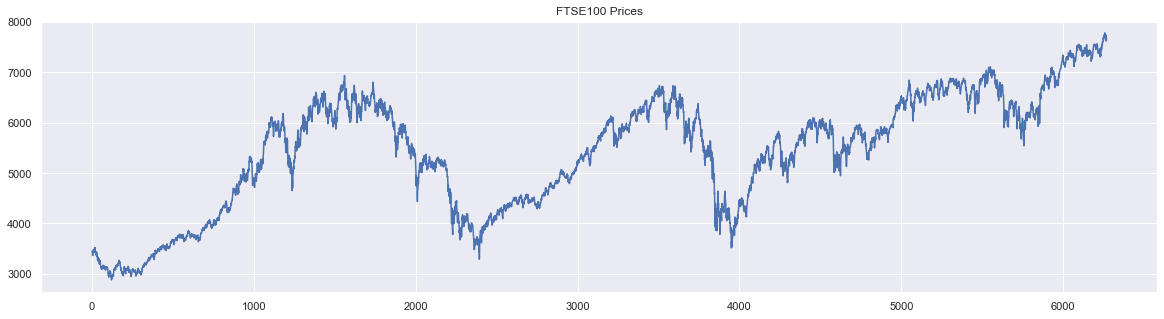

In [8]:
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")
plt.show()

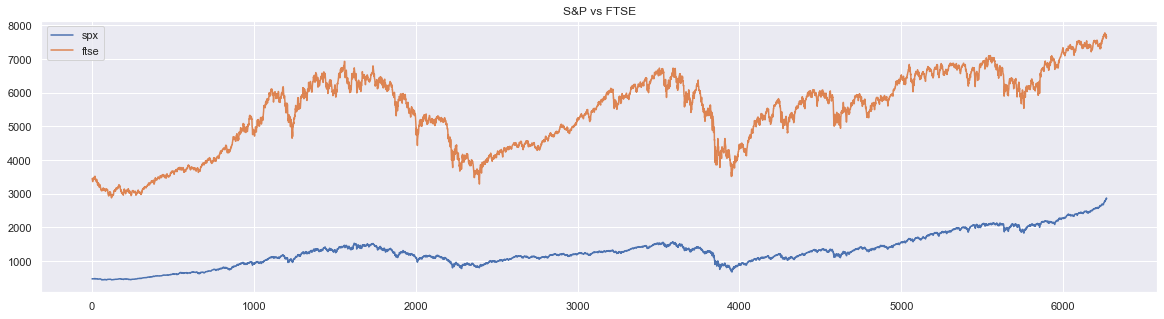

In [9]:
df_comp.spx.plot(figsize = (20,5),title = "S&P500 Prices")
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")
plt.title("S&P vs FTSE")
plt.legend()
plt.show()


## The Q-Q PLOT (Quantile - Quantile Plot)

In [10]:
import scipy.stats
import pylab

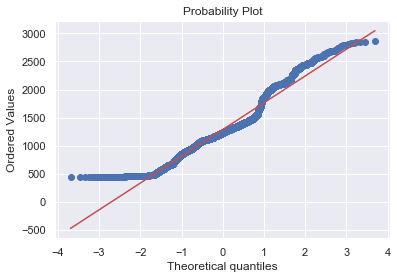

In [11]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

## Converting Date Column to Datetime type

In [12]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

In [13]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the Index

In [14]:
df_comp.set_index("date", inplace = True)

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Frequency

In [16]:
# 'b' stands for Business Days
df_comp = df_comp.asfreq('b')

In [17]:
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


## Handling Missing Values

In [18]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [19]:
df_comp.spx = df_comp.spx.fillna(method = "ffill")
df_comp.ftse = df_comp.ftse.fillna(method = "bfill")
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [20]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [21]:
df_comp['market_value'] = df_comp['spx']

In [22]:
df_comp = df_comp.drop(['spx','ftse','nikkei', 'dax'], axis = 1)
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting the Data

df => Training Set

df_test => Testing Set

In [23]:
size = int(len(df_comp)*0.8)

In [24]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [25]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [26]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## White Noise

In [27]:
# Creating the White Noise\

wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
df['wn'] = wn

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


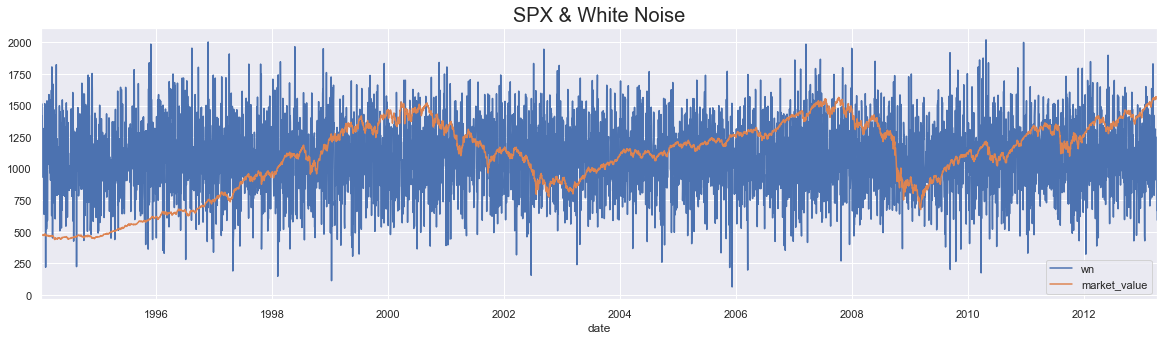

In [28]:
df.wn.plot(figsize = (20,5))
df.market_value.plot(figsize = (20,5))
plt.title("SPX & White Noise", fontsize = 20)
plt.legend()
plt.show()

## Random Walk

In [29]:
rw = pd.read_csv('RandWalk.csv')

In [30]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index(rw.date, inplace = True)
rw = rw.asfreq('b')

In [31]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


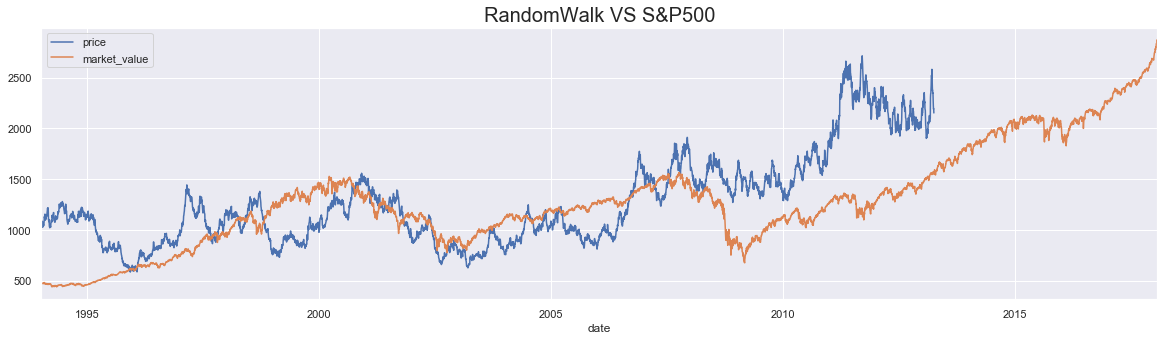

In [33]:
rw.price.plot(figsize = (20,5), title ='RandomWalk')
df_comp.market_value.plot(figsize = (20,5), title ='SNP')
plt.title('RandomWalk VS S&P500', fontsize = 20)
plt.legend()
plt.show()

## Stationarity

In [36]:
import statsmodels.tsa.stattools as sts

In [37]:
sts.adfuller(df.market_value)

(-1.7369847452352427,
 0.4121645696770626,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [38]:
sts.adfuller(df.wn)

(-71.36944701715358,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70746.46139515462)

In [40]:
sts.adfuller(rw.price)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

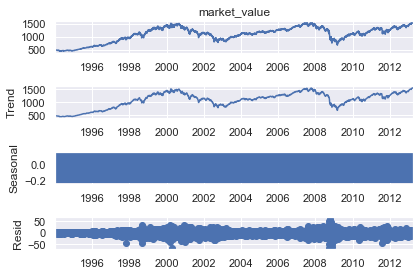

In [43]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

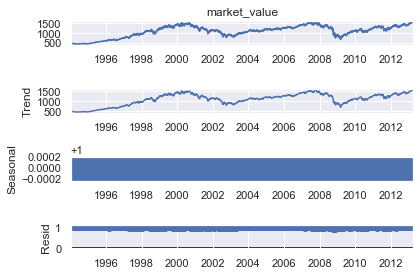

In [44]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()


## Autocorrelation Function(ACF)

In [45]:
import statsmodels.graphics.tsaplots as sgt

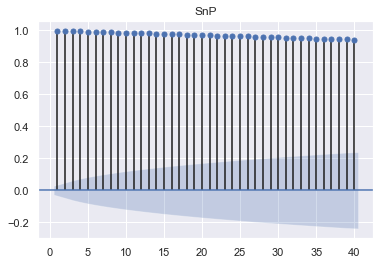

In [48]:
sgt.plot_acf(df.market_value, lags = 40,zero = False)
plt.title("SnP")
plt.show()

## Partial Autocorrelation Function (PACF)

In [51]:
import statsmodels.graphics.tsaplots as sgt

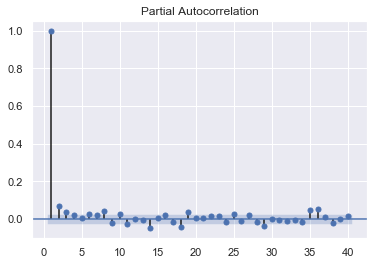

In [54]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ("ols"))
plt.show()